Exercise: *Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance.* <br>
Here, I copy all the relevant code blocks from the `exercise_10.ipynb`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))

X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

In [4]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))

X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [5]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

Exercise: *Then compute the reconstruction error for each image.*

In [7]:
X_train_pca.round(2)

array([[  3.78,  -1.85,  -5.14, ...,  -0.14,  -0.21,   0.06],
       [ 10.15,  -1.53,  -0.77, ...,   0.12,  -0.14,  -0.02],
       [-10.02,   2.88,  -0.92, ...,   0.07,  -0.  ,   0.12],
       ...,
       [  2.48,   2.96,   1.3 , ...,  -0.02,   0.03,  -0.15],
       [ -3.22,   5.35,   1.39, ...,   0.06,  -0.23,   0.16],
       [ -0.92,  -3.65,   2.26, ...,   0.14,  -0.07,   0.06]],
      dtype=float32)

In [9]:
def reconstruction_error(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [11]:
reconstruction_error(pca, X_train).mean()

0.00019205351

Exercise: *Next, take some of the modified images you built in the previous exercise and look at their reconstruction error: notice how much larger it is.*

We copy the code blocks that create the bad faces to here.

In [12]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64 * 64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64 * 64)
y_flipped = y_train[:n_rotated]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

In [13]:
X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad_faces = np.concatenate([y_rotated, y_flipped, y_darkened])

In [16]:
reconstruction_error(pca, X_bad_faces).mean()

0.004707354

Exercise: *If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.*

We copy the `plot_faces()` function from `exercise_10.ipynb`.

In [17]:
def plot_faces(faces: np.ndarray, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.title(label)
        plt.axis("off")
    plt.show()

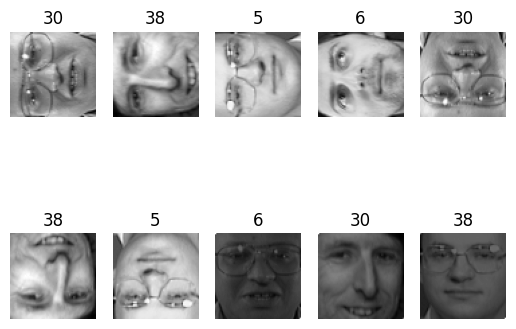

In [18]:
plot_faces(X_bad_faces, y_bad_faces)

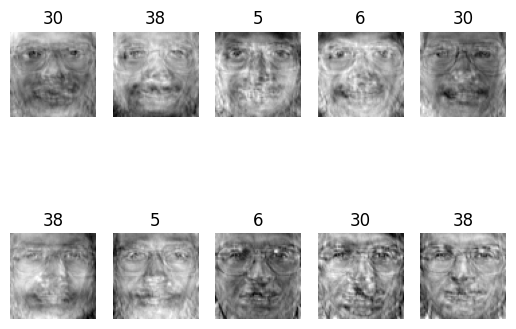

In [20]:
X_bad_faces_pca = pca.transform(X_bad_faces)
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad_faces)